In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [613]:
!pip install plotly

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [4]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #1은 본인
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train.loc[df_train.Fare.isnull(),'Fare'] = df_train['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [5]:
#null로 된 값 채우기
#title + statistics를 사용해서 null을 채운다.(Miss, Mrr, Mrs)
#pandas series 중 data를 string으로 바꿔주고 여기서 정규표현식을 적용하는 extract method가 있다. 이를 적용
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #salutations을 추출

df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #salutations을 추출

In [6]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#checking the initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [7]:
#치환
#남자 여자가쓰는 inital을 구분하여 볼 수 있도록

df_train['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [8]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mlle,Mr,Mrs,Other
Sex,,,,,,
female,0,184,2,1,127,0
male,40,0,0,528,0,9


In [9]:
df_train.groupby('Initial').mean()
df_test.groupby('Initial').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,3.112730,3.952381
Miss,1100.240506,2.443038,21.774844,0.544304,0.392405,2.927526,1.936709
Mr,1102.471074,2.309917,32.151351,0.272727,0.177686,2.744519,1.450413
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,3.566570,2.430556
Other,1053.500000,1.500000,42.750000,0.500000,0.250000,3.650053,1.750000


In [10]:
#남녀구분을 위처럼 둔뒤, AGE의 null값을 채울 차례.
#pandas df를 다룰 땐, boolean array를 이용하라? 0or1의 값으로 된 애들을 필터하는것?

df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'),'Age'] = 33
#df_train에서 Age에 null값이고 Initial이 Mr인 Age의 value를 33으로 한다.
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'),'Age'] = 36
#df_train에서 Age에 null값이고 Initial이 Mrs인 Age의 value를 36으로 한다.
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'),'Age'] = 46


#df_test는 학습에 넣을 데이터
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'),'Age'] = 33
#df_test Age에 null값이고 Initial이 Mr인 Age의 value를 33으로 한다.
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'),'Age'] = 36
#df_test Age에 null값이고 Initial이 Mrs인 Age의 value를 36으로 한다.
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'),'Age'] = 46

In [11]:
#아이디어 도출 
#https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 
#에 null값을 채우는 방법들을 응용해보기

In [12]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [13]:
#Embarked는 s에 가장 많은 탑승객이 있으므로 2개는 s로 바꿔준다.
df_train['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

In [14]:
#boolean이 아닌 continuous feature은 category화 하여 몇개의 그룹으로 나눠 모델 학습 가능
#모든 continuous를 하는 것은 information loss가 생길 수 있어 data의 특성을 보고 하는 것이 중요

#category화 방법 indexing인 loc를 이용하여 직접 or apply를 사용해 넣기

#loc
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat']=1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat']=2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

#apply

def category_age(x) :
    if x < 10 :
        return 0
    elif x < 20 :
        return 1
    elif x < 30 : 
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7  
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)
print(df_train['Age'].loc[888],df_train['Initial'].loc[888])
print(df_train['Age_cat'].loc[888])
print(df_train['Age_cat_2'].loc[888])

22.0 Miss
2
2


In [15]:
print('1번,2번 둘다 같은 결과면 true ->',(df_train['Age_cat'] == df_train['Age_cat_2']))

1번,2번 둘다 같은 결과면 true -> 0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool


In [16]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)
#Age와 Age_cat_2컬럼 제거

In [17]:
#Mrs, Ms 와 같은 word를 컴퓨터가 인식할 수 있는 값으로 맵핑
df_train['Initial'] = df_train['Initial'].map({
    'Master' : 0,
    'Miss' : 1,
    'Mr' : 2,
    'Mrs' : 3,
    'Other': 4
})

df_test['Initial'] = df_test['Initial'].map({
    'Master' : 0,
    'Miss' : 1,
    'Mr' : 2,
    'Mrs' : 3,
    'Other': 4
})

In [18]:
#Embarked값도 바꾸기, 

#그전에, Embarked 컬럼에는 뭐가 들어있을까?
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
#그리고 들어 있는 값은 각각 총 몇개를 갖고 있을까?
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#이제 숫자로 맵핑
df_train['Embarked'] = df_train['Embarked'].map({
    'C' : 0,
    'Q' : 1,
    'S' : 2
})

df_test['Embarked'] = df_test['Embarked'].map({
    'C' : 0,
    'Q' : 1,
    'S' : 2
})

In [21]:
#embarked 컬럼이 null값이 잇는지 확인해보고 싶을땐?
df_train['Embarked'].isnull().any()

#any가 없으면 하나씩 다 보여줌.
#all과 any의 차이가 뭐지?

False

In [22]:
df_test['Embarked'].isnull().any()

False

In [23]:
#Sex도 맵핑
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

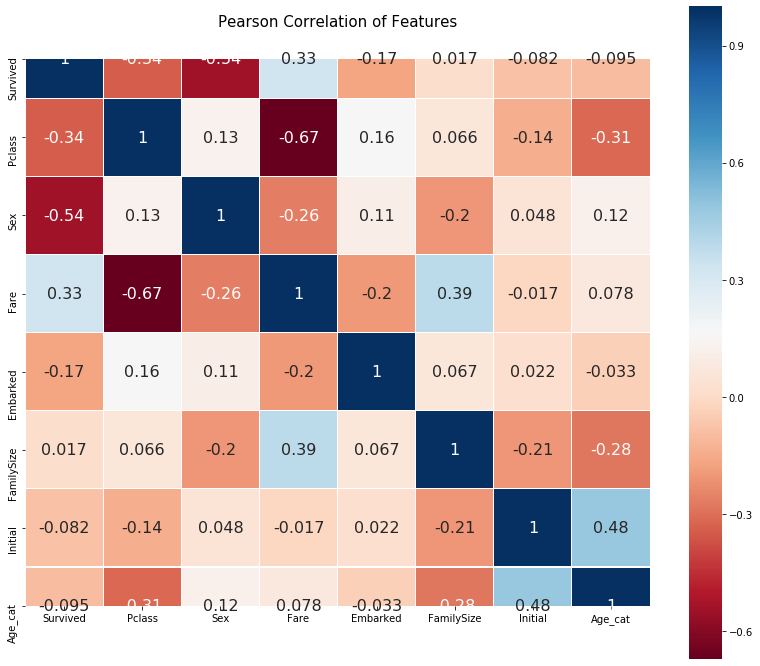

In [24]:
# 각 feature 간의 상관관계를 본다
#-1,0,1로 음의 상관관계, 0 , 양의상관관계로(0은 관계가 있고)

#feature를 하나의 matrix로 보는 방법? -> heatmap plot 이용
heatmap_data=df_train[['Survived', 'Pclass', 'Sex', 
                       'Fare', 'Embarked', 'FamilySize',
                       'Initial', 'Age_cat']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white',
           annot=True,annot_kws={'size':16})
del heatmap_data

In [25]:
#상관관계를 보고 feature간의 정보를 얻고 난 후, 이를 베이스로 전처리

In [26]:
#전처리1 : one-hot encoding
#one-hot encoding은 카테골리 수만큼 one-hot 컬럼을 만들고 해당하는 카테고리에 1을 넣고 나머지 0으로 문자를 binary로 만듦
#또한 on-hot encoding은 matrix로 이루어진 벡터로 나타내어주므로 ML을 다루는데 효율적임.

#ML에서 많이 적용하는 방법이지만
#범주가 많은 데이터는 Word2Vec이 더 나음.

In [27]:
#one-got 1: pandas의 get_dummies 이용

df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
#구분을 두는 접두사, prefix. prfix로 구분지므로 prefix에 해당하는 값은 1로 되어 표로  나타남.
#기존의 표에 컬럼이 추가 되는 것.
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [29]:
df_train= pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test= pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [31]:
sentence=df_train['Ticket']
sentence_test=df_test['Ticket']

In [32]:
# from gensim.models import Word2Vec

# embedding_model = Word2Vec(sentence, size=100, window = 2, min_count=50, workers=4, iter=100, sg=1)

In [33]:
#label encoder
from sklearn import preprocessing

y_true_label_encoder = preprocessing.LabelEncoder()
y_true_encoded = y_true_label_encoder.fit_transform(df_train['Ticket'])
y_true_encoded_test = y_true_label_encoder.fit_transform(df_test['Ticket'])
df_train['ticket_encode'] = y_true_encoded
df_test['ticket_encode'] = y_true_encoded_test

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2,ticket_encode
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,...,2,0,0,1,0,0,0,0,1,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,...,3,0,0,0,1,0,1,0,0,596
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,...,2,0,1,0,0,0,0,0,1,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,...,3,0,0,0,1,0,0,0,1,49
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,...,3,0,0,1,0,0,0,0,1,472


In [35]:
#모델에 필요한 컬럼만 남기고 나머지 컬럼 지우기
df_train.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

df_test.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [36]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2,ticket_encode
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1,523
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0,596
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1,669
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1,49
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1,472


In [37]:
#building machine learning model, 
#과제는 타이타닉 데이터를 가지고 Survived를 예측해보는 것.
#즉, Survived를 제외한 데이터를 인풋으로 넣었을 때 생존이 어떻게 될지 보는 것.
#Survived의 value는 현재 0,1로 구분되어 지므로 생존은 binary classfication으로 표현

In [38]:
#머신러닝을 위한 패키지

from sklearn.ensemble import RandomForestClassifier #머신러닝 모델(결정트리 기반, 여러 결정들을 앙상블한 모델이다)
#sklearn은 다양한 모델을 지원해준다.
#documentation에서 지원 모델을 보고 적용하는 것도 아이디어.
#http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [39]:
# 1. 가지고 있는 데이터 중 학습할 데이터와 target label를 분리(여기서 target은 Survived)
X_train = df_train.drop('Survived', axis=1).values
Target_label=df_train['Survived'].values

In [40]:
#트레이닝한 것을 테스트 하기 전 평가하는 단계를 거침
#그래서 테스트를 분리함 train->valid->test용으로
#train_test_split 이용

x_tr,x_vld,y_tr,y_vld = train_test_split(X_train, Target_label,test_size=0.3,random_state=2018)
x_tr

array([[  1.        ,   1.        ,   4.11373861, ...,   0.        ,
          1.        , 678.        ],
       [  3.        ,   1.        ,   2.05412373, ...,   0.        ,
          1.        , 522.        ],
       [  1.        ,   1.        ,   5.354225  , ...,   0.        ,
          0.        ,  27.        ],
       ...,
       [  2.        ,   1.        ,   2.35137526, ...,   0.        ,
          1.        , 672.        ],
       [  3.        ,   1.        ,   2.08567209, ...,   0.        ,
          1.        , 431.        ],
       [  3.        ,   1.        ,   1.98100147, ...,   0.        ,
          1.        , 422.        ]])

In [41]:
df_test.head()
#test는 survived를 예측해야하므로 컬럼이 없음.

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2,ticket_encode
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0,152
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1,221
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0,73
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1,147
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1,138


In [654]:
#이제 객체를 만들고 학습
model = RandomForestClassifier()
model.fit(x_tr,y_tr) #fit : 학습
prediction=model.predict(x_vld)
print(model.fit(x_tr,y_tr))
print(prediction)
df_train.head()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2,ticket_encode
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1,523
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0,596
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1,669
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1,49
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1,472


In [387]:
print(y_vld.shape[0],metrics.accuracy_score(prediction,y_vld)) #ticket encoder하기전

268 0.8246268656716418


In [655]:
print(y_vld.shape[0],metrics.accuracy_score(prediction,y_vld)) #ticket encoder한 후

268 0.8544776119402985


In [388]:
#accuracy가 낮으면 높이기 위해 파라미터 튜닝 작업을 한다.
#파라미터는 각 모델별로 여러 파라미터들이 있다.


In [656]:
#feature importance
#현재의 모델이 어떤 feature의 영향을 많이 받게 된 것인지 조회
from pandas import Series

#학습한 거에 한번 해봄
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_train.columns[1::])
# print(feature_importance)
# print(df_train.columns[1::])


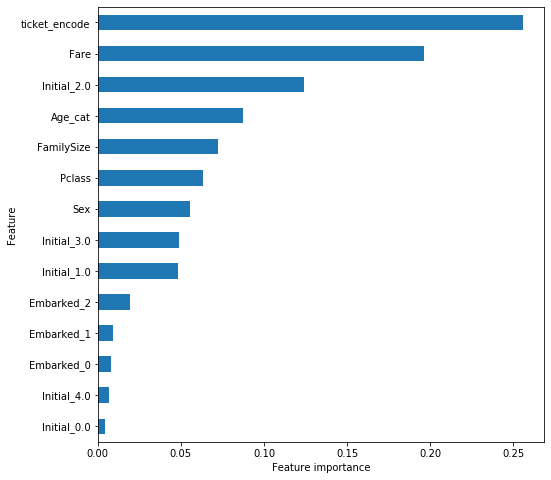

In [657]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [391]:
#실제 테스트할 데이터에도 같은 영향을 끼쳣을까
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
# print(feature_importance)

In [392]:
Series_feat_imp

Pclass        0.101925
Sex           0.079498
Fare          0.330892
FamilySize    0.102373
Age_cat       0.113495
Initial_0     0.004478
Initial_1     0.015783
Initial_2     0.188065
Initial_3     0.019750
Initial_4     0.006670
Embarked_0    0.017252
Embarked_1    0.005899
Embarked_2    0.013919
dtype: float64

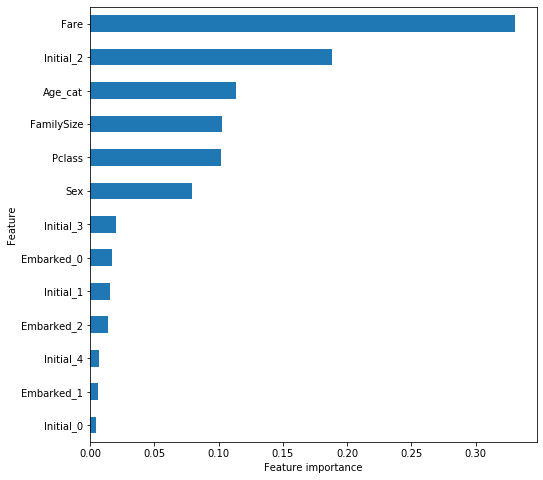

In [393]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [394]:
#학습 모델이 만들어졌으면, 학습하지 않은 data를 테스트하기

In [395]:
#df_train으로 학습했고 여기서 나온 x_vld로 valid 했으니
#df_test 로 테스트

In [658]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2,ticket_encode
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0,152
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1,221
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0,73
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1,147
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1,138


In [659]:
X_test = df_test.values
X_test
prediction = model.predict(X_test) #테스트넣어서 돌림

In [660]:
#결과
print(prediction)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [661]:
submission = pd.read_csv('./titanic/gender_submission.csv')

In [662]:
submission['Survived_1'] = prediction

In [663]:
submission.to_csv('./titanic/myfirst+ticket.csv',index=False)

In [ ]:
# 2: Logistic Regression model

In [686]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [687]:
model = LogisticRegression()
model.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [688]:
predicted_classes = model.predict(x_vld)

In [689]:
print(predicted_classes)

[0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 1]


In [690]:
y_tr.flatten() #y_vld 처럼 사용가능

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [691]:
print(accuracy_score(y_vld,predicted_classes))

0.8768656716417911


In [692]:
# feature_importance로 비교
'''
logistic은 featre_importance라는 것이 없다.
feature에대한 랭킹을 하는 방법은
coefficiecnt value, recursive feature elimination, selectFromModels 방법이 있다.

'''

'\nlogistic은 featre_importance라는 것이 없다.\nfeature에대한 랭킹을 하는 방법은\ncoefficiecnt value, recursive feature elimination, selectFromModels 방법이 있다.\n\n'

In [670]:
# 1)
parameters = model.coef_ 
print(parameters[0])
print(df_test.columns)

[-6.97019145e-01 -7.23757366e-01  5.00459656e-01 -4.79193065e-01
 -1.73215382e-01  1.63092338e+00  6.98512762e-01 -1.30520970e+00
  1.08959282e+00 -7.09794995e-01  5.97824364e-01  5.86014759e-01
  2.84103286e-01 -3.33206779e-04]
Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'ticket_encode'],
      dtype='object')


In [671]:
np.round(parameters,decimals=2) > 0

array([[False, False,  True, False, False,  True,  True, False,  True,
        False,  True,  True,  True, False]])

In [712]:
Series_feat_imp = Series(parameters[0], index=df_test.columns)
Series_feat_imp

Pclass          -0.697019
Sex             -0.723757
Fare             0.500460
FamilySize      -0.479193
Age_cat         -0.173215
Initial_0        1.630923
Initial_1        0.698513
Initial_2       -1.305210
Initial_3        1.089593
Initial_4       -0.709795
Embarked_0       0.597824
Embarked_1       0.586015
Embarked_2       0.284103
ticket_encode   -0.000333
dtype: float64

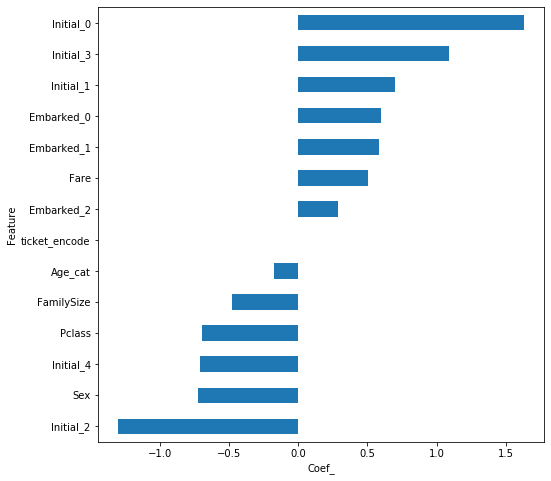

In [713]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Coef_')
plt.ylabel('Feature')
plt.show()

In [673]:
# 2)
from sklearn.feature_selection import RFE

In [674]:
selector=RFE(model,n_features_to_select=1)

In [675]:
selector

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [676]:
selector = selector.fit(x_tr,y_tr)

In [677]:
selector

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [678]:
order=selector.ranking_
order

array([ 5,  6,  8,  9, 13,  4,  3,  1,  2,  7, 10, 11, 12, 14])

In [679]:
feature_ranks=[]
for i in order :
    feature_ranks.append(f"{i} : {df_train.columns[i]}")
feature_ranks

['5 : Age_cat',
 '6 : Initial_0.0',
 '8 : Initial_2.0',
 '9 : Initial_3.0',
 '13 : Embarked_2',
 '4 : FamilySize',
 '3 : Fare',
 '1 : Pclass',
 '2 : Sex',
 '7 : Initial_1.0',
 '10 : Initial_4.0',
 '11 : Embarked_0',
 '12 : Embarked_1',
 '14 : ticket_encode']

In [423]:
# 3)
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(model, threshold=np.inf, max_features=13)
smf.fit(x_tr,y_tr)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=13, norm_order=1, prefit=False, threshold=inf)

In [424]:
feature_idx=smf.get_support()

In [693]:
prediction = model.predict(X_test) #테스트넣어서 돌림

In [694]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [695]:
submission['Survived_2'] = prediction

In [696]:
submission.to_csv('./titanic/mysecond+ticket.csv',index=False)

In [ ]:
# https://woolulu.tistory.com/1

In [697]:
from sklearn.neighbors import KNeighborsClassifier

In [698]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
#n_neighbors가 1일때는 정확도 1이었는데 2로 하니 80으로 증가 3은 82 4는 줄음
knn.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [699]:
predict_knn = knn.predict(x_vld)

In [700]:
predict_knn

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [701]:
print(accuracy_score(y_vld,predict_knn))

0.7276119402985075


In [702]:
print(np.mean(predict_knn == y_vld)) #정확도가 더 낮아짐.

0.7276119402985075


In [703]:
prediction=knn.predict(X_test)

In [704]:
submission['Survived_3'] = prediction

In [705]:
submission.to_csv('./titanic/mythird+ticket.csv',index=False)

In [464]:
# https://blogsaskorea.com/49

In [706]:
from sklearn.ensemble import GradientBoostingClassifier

In [707]:
'''
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
>>> clf.score(X_test, y_test)
'''

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                    max_depth=1, random_state=0)
clf.fit(x_tr,y_tr)
#learning_rate에 따라 정확도가 바뀜.
#0.1이 86으로 가장 높은듯.

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [708]:
clf_prediction=clf.predict(x_vld)

In [709]:
print(accuracy_score(y_vld,clf_prediction))

0.8582089552238806


In [710]:
prediction=clf.predict(X_test)
submission['Survived_4'] = prediction
submission.to_csv('./titanic/myfourth+ticket.csv',index=False)

In [512]:
clf.set_params(n_estimators=200, warm_start=True)  # set warm_start and new nr of trees
clf.fit(x_tr, y_tr) # fit additional 100 trees to est

#param 조절 가능

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [513]:
clf_prediction=clf.predict(x_vld)
print(accuracy_score(y_vld,clf_prediction)) # 더낮아짐

0.8507462686567164


In [58]:
# from autosklearn.classification import AutoSklearnClassifier

# autoML = AutoSklearnClassifier(time_left_for_this_task = 300,
#                               tmp_folder="./log/")
# autoML.fit(x_tr,y_tr)

#auto-sklearn은 conda에서 사용할 수 없는 패키지.
